# Insurance Risk Predictor
A machine learning (ML) system to predict the likelihood that a potential car insurance customer will later make an insurance claim. The proposed system can be used to better identified qualified customers and aid in premium pricing. 
    

### Table of Contents (with links):

### [Import Libraries](#import_libraries)
### [Import Dataset](#import_dataset)
### [Clean Up the Data](#clean_data)
### [Remove Unnecessary Columns](#remove_columns)
### [Remove Incomplete Rows](#remove_rows)
### [Show Updated Dataframe](#show_dataframe)
### [Data Visualization](#data_visualization)
### [Identify Features and Build ML Algorithm](#identify_features)
### [Evaluate Accuracy of Model](#evaluate_accuracy)
### [Build User Interface](#build_UI)
### [Interactable User Interface](#show_UI)


### Import Libraries 
<a id='import_libraries'></a>

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import ipywidgets as widgets
import seaborn as sns

from ipywidgets import interact, interact_manual, fixed, Label, Layout
from IPython.display import display

### Import the dataset (CSV) and convert it to a pandas dataframe
<a id='import_dataset'></a>

In [2]:
insurance_dataframe = pd.read_csv("Car_Insurance_Claim.csv")
insurance_dataframe

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,198079,65+,male,majority,30y+,university,upper class,0.570121,1,before 2015,1,1,32765,5000.0,sedan,22,0,6,1
1,588867,65+,male,majority,30y+,university,upper class,0.569639,1,before 2015,1,0,32765,NaN,sedan,19,0,2,1
2,126494,65+,male,majority,30y+,university,upper class,0.448258,1,after 2015,0,1,32765,9000.0,sports car,19,1,0,1
3,519204,65+,male,majority,30y+,high school,middle class,0.373548,1,before 2015,1,1,32765,4000.0,sedan,18,0,9,1
4,272776,65+,male,majority,30y+,high school,upper class,0.558587,1,before 2015,1,1,32765,NaN,sedan,17,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,366048,26-39,male,majority,0-9y,high school,working class,NaN,1,before 2015,0,1,10238,11000.0,sedan,0,0,0,0
9996,595418,16-25,male,minority,0-9y,high school,working class,NaN,1,before 2015,0,1,10238,11000.0,sedan,0,0,0,0
9997,302403,16-25,female,majority,0-9y,high school,working class,0.502120,1,before 2015,0,1,32765,10000.0,sedan,0,0,0,1
9998,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0


### Clean up the data
<a id='clean_data'></a>
Replace all the strings with numerical values

In [3]:
# Replace "female" with 0 and "male" with 1
insurance_dataframe["GENDER"].replace(to_replace="female", value=0, inplace=True)
insurance_dataframe["GENDER"].replace(to_replace="male", value=1, inplace=True)

# Replace ages
# 16-25 = 0
# 26-39 = 1
# 40-64 = 2
# 65+ = 3

insurance_dataframe["AGE"].replace(to_replace="16-25", value=0, inplace=True)
insurance_dataframe["AGE"].replace(to_replace="26-39", value=1, inplace=True)
insurance_dataframe["AGE"].replace(to_replace="40-64", value=2, inplace=True)
insurance_dataframe["AGE"].replace(to_replace="65+", value=3, inplace=True)

# Replace race
# majority = 0
# minority = 1

insurance_dataframe["RACE"].replace(to_replace="majority", value=0, inplace=True)
insurance_dataframe["RACE"].replace(to_replace="minority", value=1, inplace=True)

# Replace driving experience
# 0-9y = 0
# 10-19y = 1
# 20-29y = 2
# 30y+ = 3

insurance_dataframe["DRIVING_EXPERIENCE"].replace(to_replace="0-9y", value=0, inplace=True)
insurance_dataframe["DRIVING_EXPERIENCE"].replace(to_replace="10-19y", value=1, inplace=True)
insurance_dataframe["DRIVING_EXPERIENCE"].replace(to_replace="20-29y", value=2, inplace=True)
insurance_dataframe["DRIVING_EXPERIENCE"].replace(to_replace="30y+", value=3, inplace=True)

# Replace education
# none = 0
# high school = 1
# university = 2

insurance_dataframe["EDUCATION"].replace(to_replace="none", value=0, inplace=True)
insurance_dataframe["EDUCATION"].replace(to_replace="high school", value=1, inplace=True)
insurance_dataframe["EDUCATION"].replace(to_replace="university", value=2, inplace=True)

# Replace income
# poverty = 0
# working class = 1
# middle class = 2
# upper class = 3

insurance_dataframe["INCOME"].replace(to_replace="poverty", value=0, inplace=True)
insurance_dataframe["INCOME"].replace(to_replace="working class", value=1, inplace=True)
insurance_dataframe["INCOME"].replace(to_replace="middle class", value=2, inplace=True)
insurance_dataframe["INCOME"].replace(to_replace="upper class", value=3, inplace=True)

# Replace vehicle year
# before 2015 = 0
# after 2015 = 1

insurance_dataframe["VEHICLE_YEAR"].replace(to_replace="before 2015", value=0, inplace=True)
insurance_dataframe["VEHICLE_YEAR"].replace(to_replace="after 2015", value=1, inplace=True)

# Replace vehicle type
# sedan = 0
# sports car = 1

insurance_dataframe["VEHICLE_TYPE"].replace(to_replace="sedan", value=0, inplace=True)
insurance_dataframe["VEHICLE_TYPE"].replace(to_replace="sports car", value=1, inplace=True)


### Remove the columns that are irrelevant
<a id='remove_columns'></a>

In [4]:
# Drop the "RACE" column (not something we want to consider)
# Drop the "ID" column (not relevant to the analysis)
insurance_dataframe = insurance_dataframe.drop(columns=['RACE', 'ID'])

### Remove incomplete rows
<a id='remove_rows'></a>

In [5]:
# Drop all the rows with NaN values
insurance_dataframe.dropna(axis='rows', inplace=True)

### Show updated dataframe
<a id='show_dataframe'></a>

In [6]:
insurance_dataframe.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,3,2,3,0.570121,1,0,1,1,32765,5000.0,0,22,0,6,1
2,3,1,3,2,3,0.448258,1,1,0,1,32765,9000.0,1,19,1,0,1
3,3,1,3,1,2,0.373548,1,0,1,1,32765,4000.0,0,18,0,9,1
5,3,1,3,2,3,0.562488,1,0,1,1,32765,6000.0,0,17,2,2,1
7,3,1,3,2,3,0.539120,1,0,1,1,32765,10000.0,0,16,0,3,1


# Data Visualization
<a id='data_visualization'></a>

### Bar graph showing distribution of customers in dateset with and without prior claims

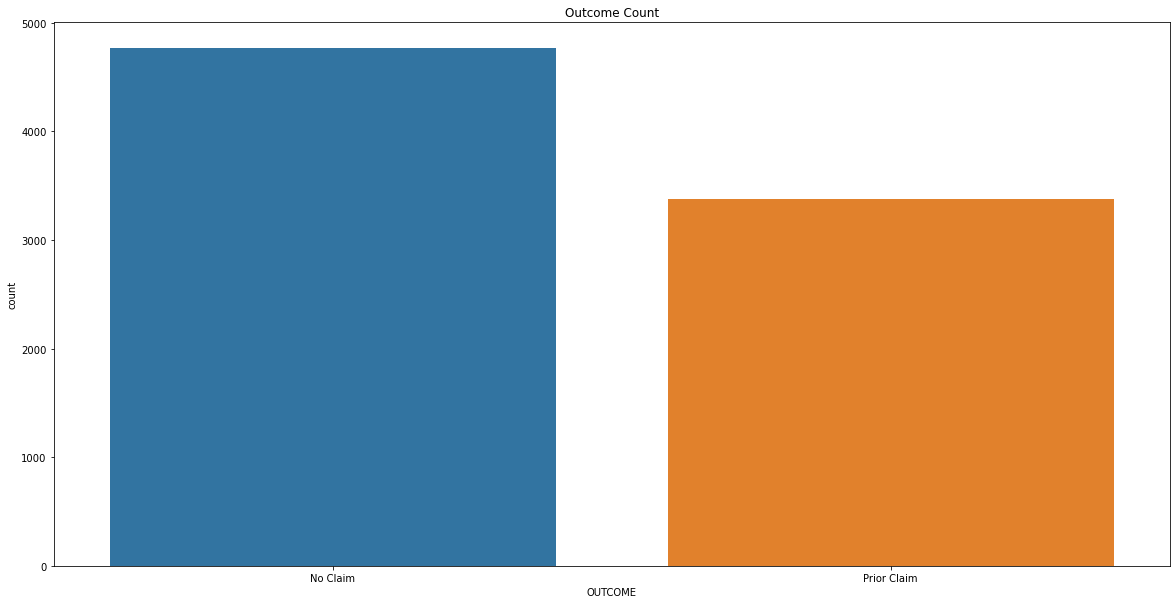

In [7]:
plt.figure(figsize=(20,10))
plt.title('Outcome Count')
graph1 = sns.countplot(data=insurance_dataframe, x ='OUTCOME')
graph1.set_xticklabels(["No Claim", "Prior Claim"]);

### Bar graph showing age distribution of customers in the dateset

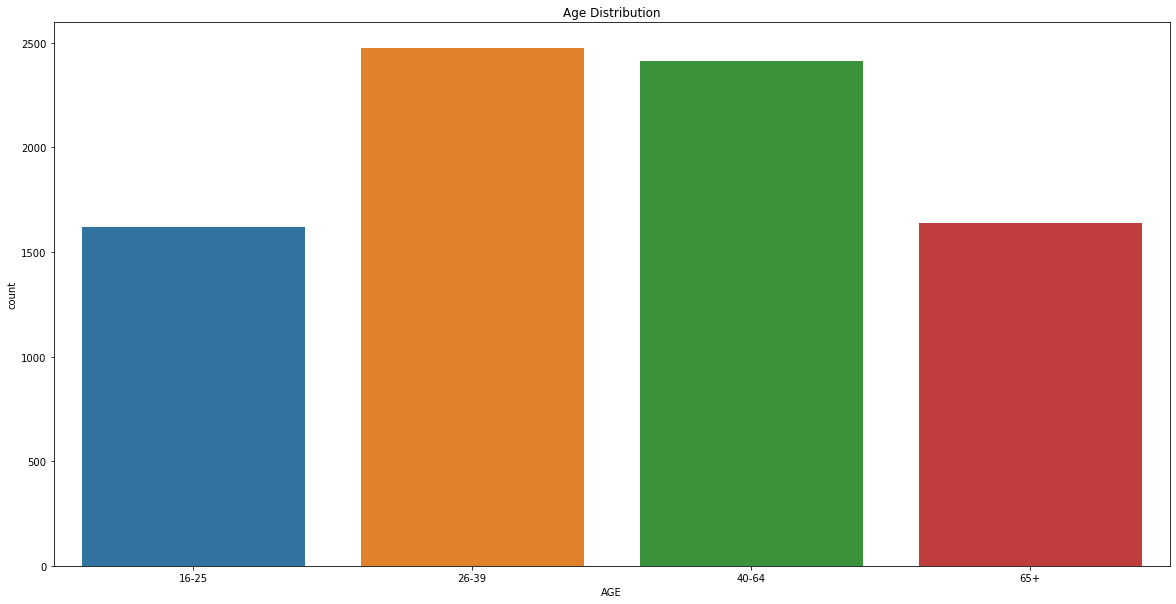

In [8]:
plt.figure(figsize=(20,10))
plt.title('Age Distribution')
graph2 = sns.countplot(data=insurance_dataframe, x ='AGE');
graph2.set_xticklabels(["16-25", "26-39", "40-64", "65+"]);


### Bar graph showing claim history compared to customer income level

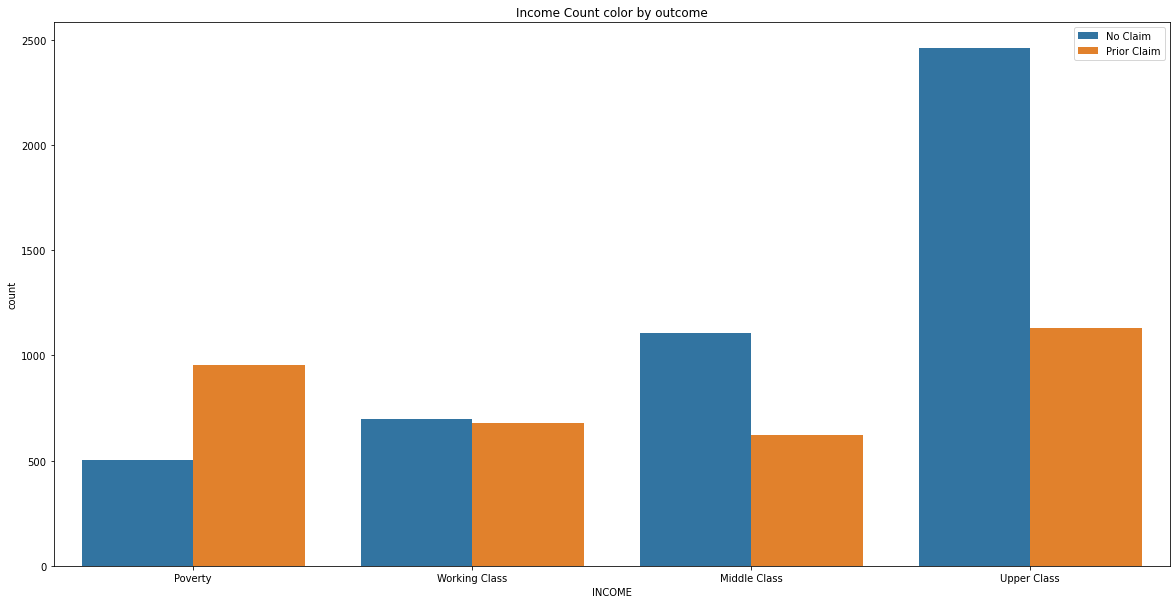

In [9]:
plt.figure(figsize=(20,10))
plt.title('Income Count color by outcome')
graph3 = sns.countplot(data=insurance_dataframe, x ='INCOME', hue='OUTCOME');
graph3.legend(labels=["No Claim", "Prior Claim"])
graph3.set_xticklabels(["Poverty", "Working Class", "Middle Class", "Upper Class"]);


## Identify features and labels and build machine learning algorithm
<a id='identify_features'></a>

In [32]:
# 1. Identify Features
# Create X (features matrix)
X = insurance_dataframe.drop("OUTCOME", axis=1)

# Create Y (labels)
Y = insurance_dataframe["OUTCOME"]

In [11]:
# 2. Choose the model and hyperparameters (dials on the model we can tune to make it better or worse)
# Using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #clf is short for classifier

# We'll keep the default hyperparameters
clf.get_params()

# The stuff printed below are our hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# 3. Fit the model to the training data
# The code below splits your data from X and Y to X train/X test and Y train/Y test
from sklearn.model_selection import train_test_split

# Use 20% of the dataset for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
# Use random forest to find the patterns in the training data
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [14]:
# Make a prediction
Y_preds = clf.predict(X_test)

In [15]:
Y_preds

array([0, 0, 0, ..., 0, 1, 1])

In [16]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, Y_train)

1.0

In [17]:
# Evaluate the test data
clf.score(X_test, Y_test)

0.8239263803680982

### Model Accuracy Evaluation
<a id='evaluate_accuracy'></a>

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       954
           1       0.79      0.79      0.79       676

    accuracy                           0.82      1630
   macro avg       0.82      0.82      0.82      1630
weighted avg       0.82      0.82      0.82      1630



In [19]:
confusion_matrix(Y_test, Y_preds)

array([[811, 143],
       [144, 532]])

In [20]:
accuracy_score(Y_test, Y_preds)

0.8239263803680982

In [21]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.74%

Trying model with 20 estimators...
Model accuracy on test set: 81.84%

Trying model with 30 estimators...
Model accuracy on test set: 82.27%

Trying model with 40 estimators...
Model accuracy on test set: 81.90%

Trying model with 50 estimators...
Model accuracy on test set: 82.45%

Trying model with 60 estimators...
Model accuracy on test set: 82.70%

Trying model with 70 estimators...
Model accuracy on test set: 82.82%

Trying model with 80 estimators...
Model accuracy on test set: 82.33%

Trying model with 90 estimators...
Model accuracy on test set: 82.52%



# Build UI
<a id='build_UI'></a>

In [30]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <------------------- Build gender selection boxes ------------------->
# "female" = 0 
# "male" = 1

gender = 0
def male_clicked(arg):
    global gender
    gender = 1
#     print(gender)
#     print("male button has been clicked!")
    
    male_button.style.button_color = 'lightgreen'
    female_button.style.button_color = 'lightgray'


male_button = widgets.Button(description = 'Male')   
male_button.on_click(male_clicked)

def female_clicked(arg):
    global gender
    gender = 0
#     print(gender)
#     print("female button has been clicked!")
    
    female_button.style.button_color = 'lightgreen'
    male_button.style.button_color = 'lightgray'
    
female_button = widgets.Button(description = 'Female')   
female_button.on_click(female_clicked)


# <------------------- Build age selection box ------------------->

# Age
# 16-25 = 0
# 26-39 = 1
# 40-64 = 2
# 65+ = 3

age = 2
        
age_box = widgets.BoundedIntText(
    value=35,
    min=16,
    max=100,
    step=1,
    description='Age:',
    disabled=False
)

def on_age_change(b):
    global age
    age = int(age_box.value)
    if age < 26:
        age = 0
    elif age >= 26 and age < 40:
        age = 1
    elif age >= 40 and age < 65:
        age = 2
    else:
        age = 3
#     print(age)

age_box.on_trait_change(on_age_change)


# <------------------- Build driving experience buttons ------------------->
# 0-9y = 0
# 10-19y = 1
# 20-29y = 2
# 30y+ = 3

driving_experience = 2

def zero_to_nine_clicked(arg):
    global driving_experience
    driving_experience = 0
#     print("0-9 yrs selected")
#     print("Driving experience: " + str(driving_experience))
    
    zero_to_nine_button.style.button_color = 'lightgreen'
    ten_to_nineteen_button.style.button_color = 'lightgray'
    twenty_to_twentynine_button.style.button_color = 'lightgray'
    thirty_plus_button.style.button_color = 'lightgray'


zero_to_nine_button = widgets.Button(description = '0-9 yrs')   
zero_to_nine_button.on_click(zero_to_nine_clicked)

def ten_to_nineteen_clicked(arg):
    global driving_experience
    driving_experience = 1
#     print("10-19 yrs selected")
#     print("Driving experience: " + str(driving_experience))
    
    zero_to_nine_button.style.button_color = 'lightgray'
    ten_to_nineteen_button.style.button_color = 'lightgreen'
    twenty_to_twentynine_button.style.button_color = 'lightgray'
    thirty_plus_button.style.button_color = 'lightgray'

ten_to_nineteen_button = widgets.Button(description = '10-19 yrs')   
ten_to_nineteen_button.on_click(ten_to_nineteen_clicked)

def twenty_to_twentynine_clicked(arg):
    global driving_experience
    driving_experience = 2
#     print("20-29 yrs selected")
#     print("Driving experience: " + str(driving_experience))
    
    zero_to_nine_button.style.button_color = 'lightgray'
    ten_to_nineteen_button.style.button_color = 'lightgray'
    twenty_to_twentynine_button.style.button_color = 'lightgreen'
    thirty_plus_button.style.button_color = 'lightgray'

twenty_to_twentynine_button = widgets.Button(description = '20-29 yrs')   
twenty_to_twentynine_button.on_click(twenty_to_twentynine_clicked)

def thirty_plus_clicked(arg):
    global driving_experience
    driving_experience = 3
#     print("30+ yrs selected")
#     print("Driving experience: " + str(driving_experience))
    
    zero_to_nine_button.style.button_color = 'lightgray'
    ten_to_nineteen_button.style.button_color = 'lightgray'
    twenty_to_twentynine_button.style.button_color = 'lightgray'
    thirty_plus_button.style.button_color = 'lightgreen'

thirty_plus_button = widgets.Button(description = '30+ yrs')   
thirty_plus_button.on_click(thirty_plus_clicked)

# <------------------- Build education level buttons ------------------->
# Education level
# none = 0
# high school = 1
# university = 2

education_level = 1

def uneducated_clicked(arg):
    global education_level
    education_level = 0
#     print("No education")
#     print("Education level: " + str(education_level))
    
    uneducated_button.style.button_color = 'lightgreen'
    high_school_button.style.button_color = 'lightgray'
    university_button.style.button_color = 'lightgray'


uneducated_button = widgets.Button(description = 'None')   
uneducated_button.on_click(uneducated_clicked)

def high_school_clicked(arg):
    global education_level
    education_level = 1
#     print("High school selected")
#     print("Education level: " + str(education_level))
    
    uneducated_button.style.button_color = 'lightgray'
    high_school_button.style.button_color = 'lightgreen'
    university_button.style.button_color = 'lightgray'

high_school_button = widgets.Button(description = 'High school')   
high_school_button.on_click(high_school_clicked)

def university_clicked(arg):
    global education_level
    education_level = 2
#     print("University selected")
#     print("Education level: " + str(education_level))
    
    uneducated_button.style.button_color = 'lightgray'
    high_school_button.style.button_color = 'lightgray'
    university_button.style.button_color = 'lightgreen'

university_button = widgets.Button(description = 'University')   
university_button.on_click(university_clicked)

# <------------------- Build income level buttons ------------------->
# Income level
# poverty = 0
# working class = 1
# middle class = 2
# upper class = 3

income_level = 2

def poverty_clicked(arg):
    global income_level
    income_level = 0
#     print("Poverty selected")
#     print("Income level: " + str(income_level))
    
    poverty_button.style.button_color = 'lightgreen'
    working_class_button.style.button_color = 'lightgray'
    middle_class_button.style.button_color = 'lightgray'
    upper_class_button.style.button_color = 'lightgray'


poverty_button = widgets.Button(description = 'Poverty')   
poverty_button.on_click(poverty_clicked)

def working_class_clicked(arg):
    global income_level
    income_level = 1
#     print("Working class selected")
#     print("Income level: " + str(income_level))
    
    poverty_button.style.button_color = 'lightgray'
    working_class_button.style.button_color = 'lightgreen'
    middle_class_button.style.button_color = 'lightgray'
    upper_class_button.style.button_color = 'lightgray'

working_class_button = widgets.Button(description = 'Working Class')   
working_class_button.on_click(working_class_clicked)

def middle_class_clicked(arg):
    global income_level
    income_level = 2
#     print("Middle class selected")
#     print("Income level: " + str(income_level))
    
    poverty_button.style.button_color = 'lightgray'
    working_class_button.style.button_color = 'lightgray'
    middle_class_button.style.button_color = 'lightgreen'
    upper_class_button.style.button_color = 'lightgray'

middle_class_button = widgets.Button(description = 'Middle class')   
middle_class_button.on_click(middle_class_clicked)

def upper_class_clicked(arg):
    global income_level
    income_level = 3
#     print("Upper class selected")
#     print("Income level: " + str(income_level))
    
    poverty_button.style.button_color = 'lightgray'
    working_class_button.style.button_color = 'lightgray'
    middle_class_button.style.button_color = 'lightgray'
    upper_class_button.style.button_color = 'lightgreen'

upper_class_button = widgets.Button(description = 'Upper class')   
upper_class_button.on_click(upper_class_clicked)


# <------------------- Credit score selection box ------------------->
# Credit scores (option #2)
# ranging from 300 to 850
# ((Customer credit score) - 299) / 550 = customer credit score as a fractional number
        
credit_score = (750 - 300) / 550    
    
credit_score_box = widgets.BoundedIntText(
    value=800,
    min=300,
    max=850,
    step=1,
    description='Credit score:',
    disabled=False
    
)

def on_credit_change(b):
    global credit_score
    credit_score = (credit_score_box.value - 300) / 550
#     print(credit_score)

credit_score_box.on_trait_change(on_credit_change)


# <------------------- Build vehicle ownership buttons ------------------->
# Vehicle ownership
# "loan" = 0 
# "owned" = 1

vehicle_ownership = 1

def owner_clicked(arg):
    global vehicle_ownership
    vehicle_ownership = 1
#     print(vehicle_ownership)
#     print("own vehicle clicked!")
    
    owner_button.style.button_color = 'lightgreen'
    loaner_button.style.button_color = 'lightgray'


owner_button = widgets.Button(description = 'Own Vehicle')   
owner_button.on_click(owner_clicked)


def loaner_clicked(arg):
    global vehicle_ownership
    vehicle_ownership = 0
#     print(vehicle_ownership)
#     print("lien button clicked!")
    
    owner_button.style.button_color = 'lightgray'
    loaner_button.style.button_color = 'lightgreen'


loaner_button = widgets.Button(description = 'Lien on Vehicle')   
loaner_button.on_click(loaner_clicked)

# <------------------- Build vehicle year buttons ------------------->
# Vehicle year
# before 2015 = 0
# after 2015 = 1

vehicle_year = 1

def before_2015_clicked(arg):
    global vehicle_year
    vehicle_year = 0
#     print(vehicle_year)
#     print("before 2015 selected")
    
    before_2015_button.style.button_color = 'lightgreen'
    after_2015_button.style.button_color = 'lightgray'


before_2015_button = widgets.Button(description = 'Before 2015')   
before_2015_button.on_click(before_2015_clicked)

def after_2015_clicked(arg):
    global vehicle_year
    vehicle_year = 1
#     print(vehicle_year)
#     print("after 2015 selected")
    
    before_2015_button.style.button_color = 'lightgray'
    after_2015_button.style.button_color = 'lightgreen'


after_2015_button = widgets.Button(description = 'After 2015')   
after_2015_button.on_click(after_2015_clicked)

# <------------------- Build marriage status buttons ------------------->
# Married
# Single = 0
# Married = 1

marriage_status = 1

def single_clicked(arg):
    global marriage_status
    marriage_status = 0
#     print(marriage_status)
#     print("single selected")
    
    single_button.style.button_color = 'lightgreen'
    married_button.style.button_color = 'lightgray'

single_button = widgets.Button(description = 'Single')   
single_button.on_click(single_clicked)

def married_clicked(arg):
    global marriage_status
    marriage_status = 1
#     print(marriage_status)
#     print("married selected")
    
    single_button.style.button_color = 'lightgray'
    married_button.style.button_color = 'lightgreen'


married_button = widgets.Button(description = 'Married')   
married_button.on_click(married_clicked)

# <------------------- Build parent status buttons ------------------->
# Children
# No children = 0
# Children = 1

parent_status = 1

def no_children_clicked(arg):
    global parent_status
    parent_status = 0
#     print(parent_status)
#     print("No children")
    
    no_children_button.style.button_color = 'lightgreen'
    has_children_button.style.button_color = 'lightgray'

no_children_button = widgets.Button(description = 'No children')   
no_children_button.on_click(no_children_clicked)

def has_children_clicked(arg):
    global parent_status
    parent_status = 1
#     print(parent_status)
#     print("Has children")
    
    no_children_button.style.button_color = 'lightgray'
    has_children_button.style.button_color = 'lightgreen'


has_children_button = widgets.Button(description = 'Has children')   
has_children_button.on_click(has_children_clicked)

# <------------------- Build customer state buttons ------------------->
# State
# 10238 = NY
# 21217 = Maryland (MD)
# 32765 = Florida
# 97102 = Oregon

customer_state_by_zip = 10238

def state_NY_clicked(arg):
    global customer_state_by_zip
    customer_state_by_zip = 10238
#     print("State: NY")
#     print("Zip: " + str(customer_state_by_zip))
    
    NY_button.style.button_color = 'lightgreen'
    MD_button.style.button_color = 'lightgray'
    FL_button.style.button_color = 'lightgray'
    OR_button.style.button_color = 'lightgray'


NY_button = widgets.Button(description = 'New York')   
NY_button.on_click(state_NY_clicked)

def state_MD_clicked(arg):
    global customer_state_by_zip
    customer_state_by_zip = 21217
#     print("State: MD")
#     print("Zip: " + str(customer_state_by_zip))
    
    NY_button.style.button_color = 'lightgray'
    MD_button.style.button_color = 'lightgreen'
    FL_button.style.button_color = 'lightgray'
    OR_button.style.button_color = 'lightgray'

MD_button = widgets.Button(description = 'Maryland')   
MD_button.on_click(state_MD_clicked)

def state_FL_clicked(arg):
    global customer_state_by_zip
    customer_state_by_zip = 32765
#     print("State: FL")
#     print("Zip: " + str(customer_state_by_zip))
    
    NY_button.style.button_color = 'lightgray'
    MD_button.style.button_color = 'lightgray'
    FL_button.style.button_color = 'lightgreen'
    OR_button.style.button_color = 'lightgray'

FL_button = widgets.Button(description = 'Florida')   
FL_button.on_click(state_FL_clicked)

def state_OR_clicked(arg):
    global customer_state_by_zip
    customer_state_by_zip = 97102
#     print("State: OR")
#     print("Zip: " + str(customer_state_by_zip))
    
    NY_button.style.button_color = 'lightgray'
    MD_button.style.button_color = 'lightgray'
    FL_button.style.button_color = 'lightgray'
    OR_button.style.button_color = 'lightgreen'

OR_button = widgets.Button(description = 'Oregon')   
OR_button.on_click(state_OR_clicked)

# <------------------- Build annual mileage selection box ------------------->
# Annual mileage
# ranging from 2000 to 22000

annual_mileage = 10000

annual_mileage_box = widgets.BoundedIntText(
    value=10000,
    min=2000,
    max=25000,
    step=1,
    description="Annual miles:",
    disabled=False
)

def on_annual_mileage_box_change(b):
    global annual_mileage
    annual_mileage = int(annual_mileage_box.value)
#     print(annual_mileage)

annual_mileage_box.on_trait_change(on_annual_mileage_box_change)


# <------------------- Build vehicle type buttons ------------------->
# Vehicle type
# sedan = 0
# sports car = 1

vehicle_type = 0

def sedan_clicked(arg):
    global vehicle_type
    vehicle_type = 0
#     print(vehicle_type)
#     print("Sedan selected")
    
    sedan_button.style.button_color = 'lightgreen'
    sports_car_button.style.button_color = 'lightgray'

sedan_button = widgets.Button(description = 'Sedan')   
sedan_button.on_click(sedan_clicked)

def sports_car_clicked(arg):
    global vehicle_type
    vehicle_type = 1
#     print(vehicle_type)
#     print("Sports car selected")
    
    sedan_button.style.button_color = 'lightgray'
    sports_car_button.style.button_color = 'lightgreen'

sports_car_button = widgets.Button(description = 'Sports Car')   
sports_car_button.on_click(sports_car_clicked)

# <------------------- Build speeding violations box ------------------->
# Speeding violations
# ranging from 0 to 25

speeding_violations = 0

speeding_violations_box = widgets.BoundedIntText(
    value=0,
    min=0,
    max=25,
    step=1,
    disabled=False
)

def on_speeding_violations_change(b):
    global speeding_violations
    speeding_violations = int(speeding_violations_box.value)
#     print(speeding_violations)

speeding_violations_box.on_trait_change(on_speeding_violations_change)

# <------------------- Build DUI arrests box ------------------->
# DUII arrests
# ranging from 0 to 10

DUI_arrests = 0

DUII_box = widgets.BoundedIntText(
    value=0,
    min=0,
    max=10,
    step=1,
    disabled=False
)

def on_DUII_box_change(b):
    global DUI_arrests
    DUI_arrests = int(DUII_box.value)
#     print(DUI_arrests)

DUII_box.on_trait_change(on_DUII_box_change)


# <------------------- Build DUI arrests box ------------------->
# Past accidents
# ranging from 0 to 20

past_accidents = 0

past_accidents_box = widgets.BoundedIntText(
    value=0,
    min=0,
    max=20,
    step=1,
    disabled=False
)

def on_past_accidents_box_change(b):
    global past_accidents
    past_accidents = int(past_accidents_box.value)
#     print(past_accidents)

past_accidents_box.on_trait_change(on_past_accidents_box_change)


# <------------------- Build "Predict Risk Level" box ------------------->

customer_risk_level = 0
def predict_clicked(arg):
    global customer_risk_level
    test_driver = np.array([age, gender, driving_experience, education_level, income_level, credit_score, 
                        vehicle_ownership, vehicle_year, marriage_status, parent_status, customer_state_by_zip, 
                        annual_mileage, vehicle_type, speeding_violations, DUI_arrests, past_accidents])
    test_driver = test_driver.reshape(1, -1)
#     manual_test = clf.predict(test_driver)
    clf.predict_proba(test_driver)
    risk_score = clf.predict_proba(test_driver)[0][1] * 100
    print(f"This driver has a predicted risk level of {risk_score:.1f}%")
    print("(0 represents a low-risk driver. 100 represents a high-risk driver.)")
    print("")

predict_risk_button = widgets.Button(description = 'Predict Risk Level')   
predict_risk_button.style.button_color = 'lightblue'
predict_risk_button.on_click(predict_clicked)


# Interactable User Interface (see below code block)
<a id='show_UI'></a>

In [31]:
print("")
print("-------------------------------")
print("Please select customer features:")
print("-------------------------------")
print("")

# <------------------- Displayed the Boxes/Buttons ------------------->
# Age
display(age_box)
# Gender
gender_buttons = widgets.HBox([Label('Gender:'), male_button, female_button])
display(gender_buttons)
# Driving experience
driving_experience_buttons = widgets.HBox([Label('Driving Experience:'), zero_to_nine_button, ten_to_nineteen_button, twenty_to_twentynine_button, thirty_plus_button])
display(driving_experience_buttons)
# Education level
education_buttons = widgets.HBox([Label('Education Level:'), uneducated_button, high_school_button, university_button])
display(education_buttons)
# Income level
income_buttons = widgets.HBox([Label('Income Level:'),poverty_button, working_class_button, middle_class_button, upper_class_button])
display(income_buttons)
# Credit score
display(credit_score_box)
# Vehicle ownership
vehicle_ownership_buttons = widgets.HBox([Label('Vehicle Ownership:'),owner_button, loaner_button])
display(vehicle_ownership_buttons)
# Vehicle year
vehicle_year_buttons = widgets.HBox([Label('Vehicle Year:'),before_2015_button, after_2015_button])
display(vehicle_year_buttons)
# Marriage status
marriage_status_buttons = widgets.HBox([Label('Marriage Status:'), single_button, married_button])
display(marriage_status_buttons)
# Parent status
parental_status_buttons = widgets.HBox([Label('Parental Status:'), no_children_button, has_children_button])
display(parental_status_buttons)
# Customer state of residence
state_buttons = widgets.HBox([Label('State of Residence:'), NY_button, FL_button, OR_button, MD_button,])
display(state_buttons)
# Annual mileage
display(annual_mileage_box)
# Vehicle type
vehicle_type_buttons = widgets.HBox([Label('Vehicle Type:'), sedan_button, sports_car_button])
display(vehicle_type_buttons)
# Speed violations
speed_violation_buttons = widgets.HBox([Label("Speeding Violations:"), speeding_violations_box])
display(speed_violation_buttons)
# DUI arrests
DUI_arrest_boxes = widgets.HBox([Label("DUI Arrests:"), DUII_box])
display(DUI_arrest_boxes)
# Past accidents
past_accident_boxes = widgets.HBox([Label("Past Accidents:"), past_accidents_box])
display(past_accident_boxes)
# Predict risk level
risk_level_boxes = widgets.HBox([predict_risk_button])
display(risk_level_boxes)


-------------------------------
Please select customer features:
-------------------------------



BoundedIntText(value=35, description='Age:', min=16)

BoundedIntText(value=800, description='Credit score:', max=850, min=300)

BoundedIntText(value=10000, description='Annual miles:', max=25000, min=2000)